Data types
Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

 Dataset size
(2240, 22)

 Distribution of key features


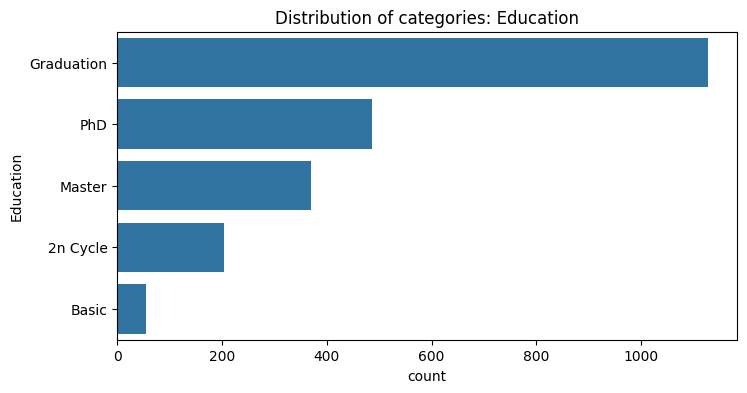

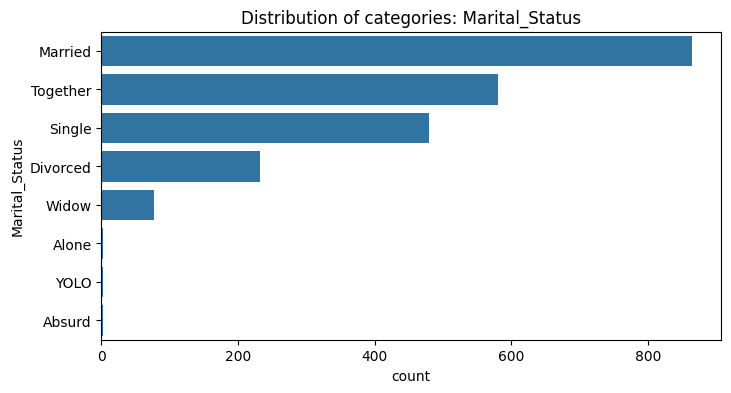

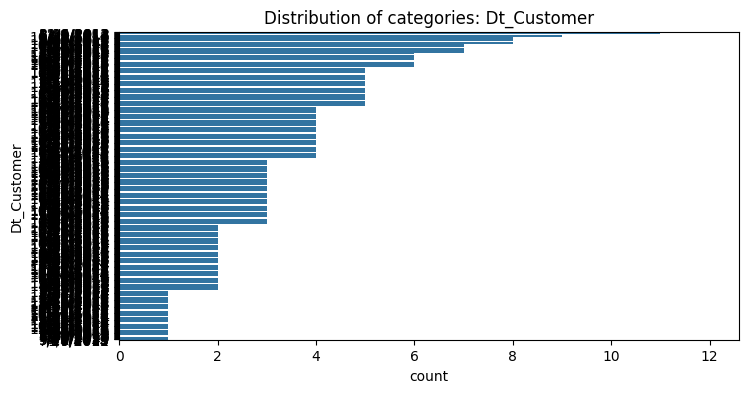

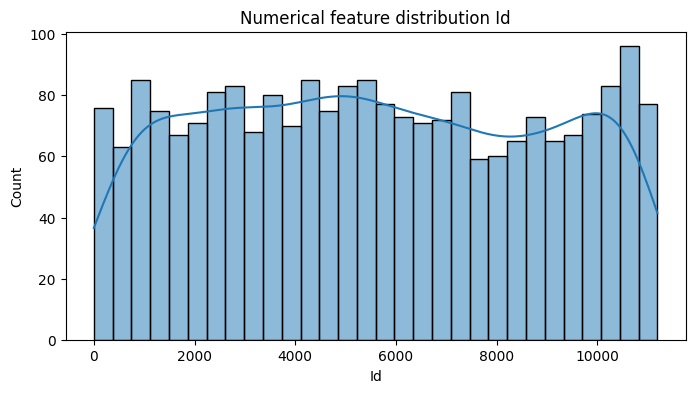

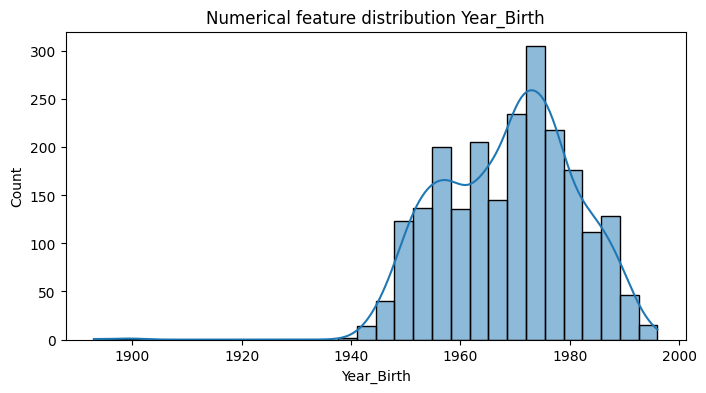

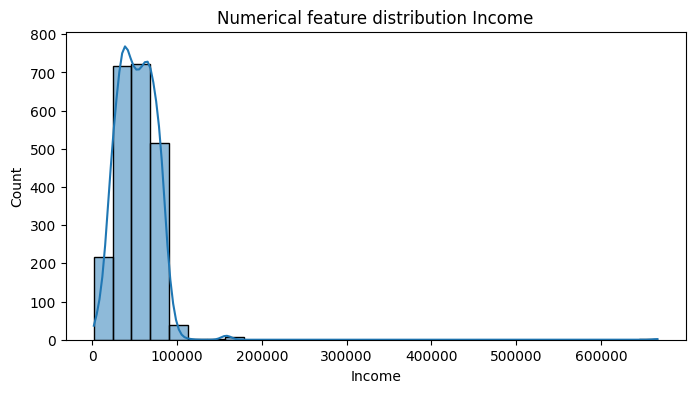

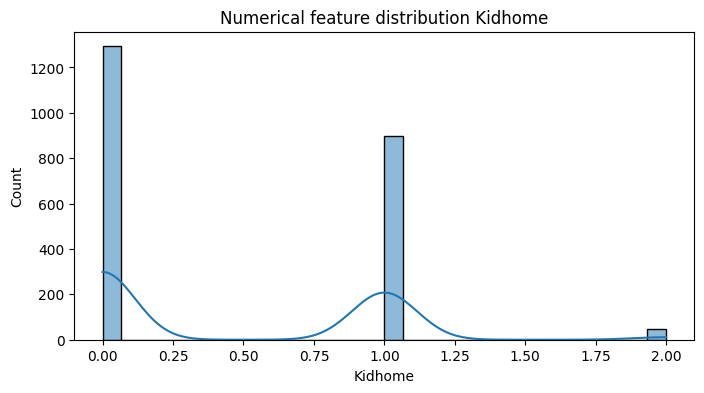

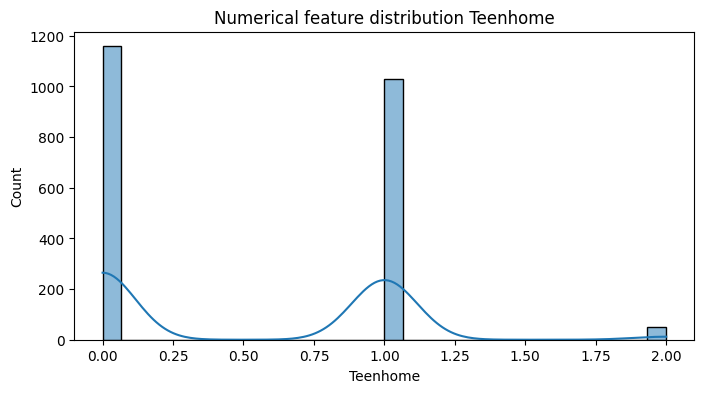


 Scale of numerical values
                        min       max          mean           std
Id                      0.0   11191.0   5592.159821   3246.662198
Year_Birth           1893.0    1996.0   1968.805804     11.984069
Income               1730.0  666666.0  52247.251354  25173.076661
Kidhome                 0.0       2.0      0.444196      0.538398
Teenhome                0.0       2.0      0.506250      0.544538
Recency                 0.0      99.0     49.109375     28.962453
MntWines                0.0    1493.0    303.935714    336.597393
MntFruits               0.0     199.0     26.302232     39.773434
MntMeatProducts         0.0    1725.0    166.950000    225.715373
MntFishProducts         0.0     259.0     37.525446     54.628979
MntSweetProducts        0.0     263.0     27.062946     41.280498
MntGoldProds            0.0     362.0     44.021875     52.167439
NumDealsPurchases       0.0      15.0      2.325000      1.932238
NumWebPurchases         0.0      27.0      4.084

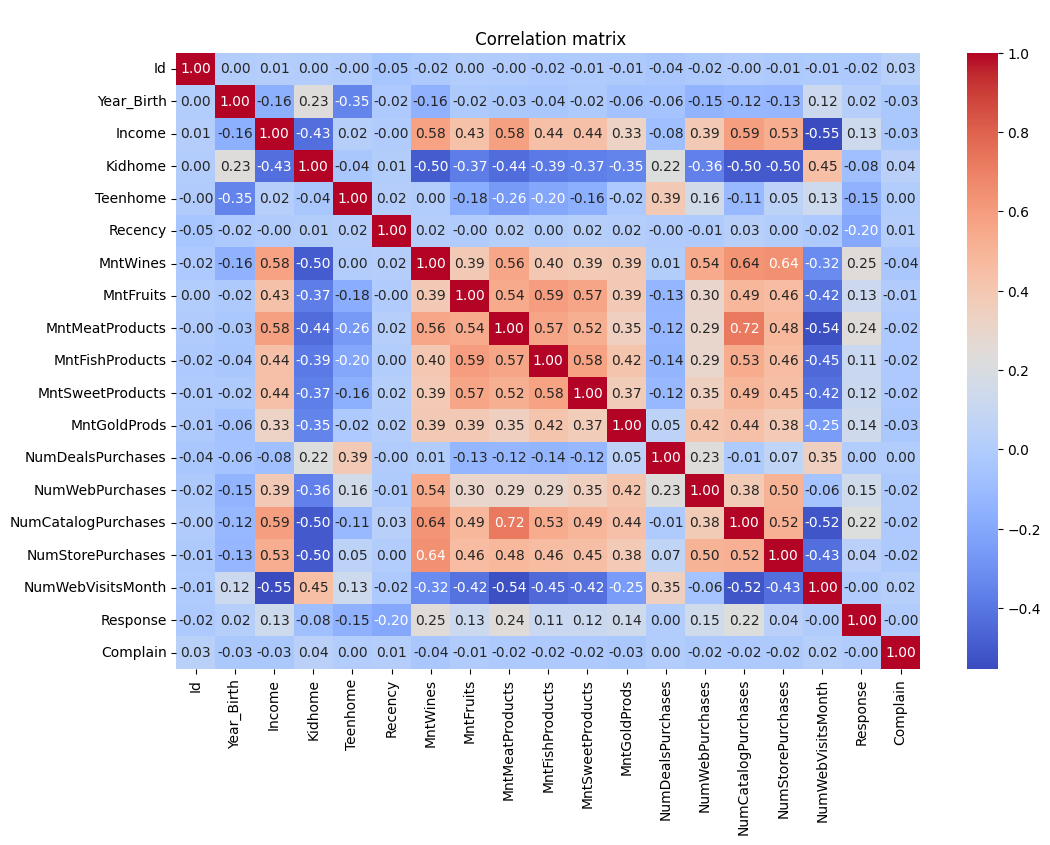


 Anomaly detection
Id: 0 anomalous values


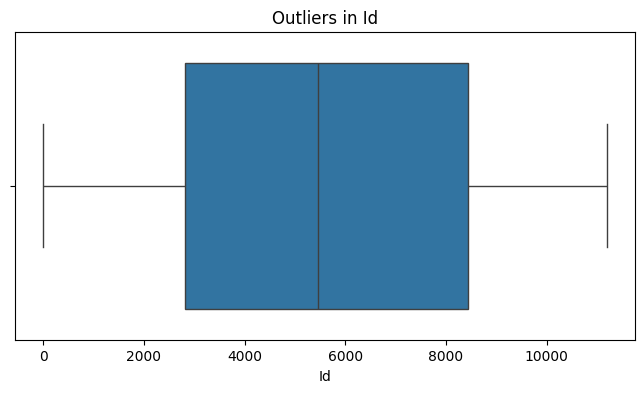

Year_Birth: 3 anomalous values


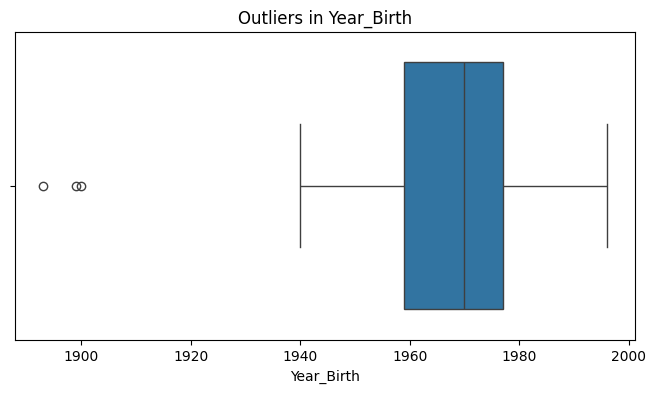

Income: 8 anomalous values


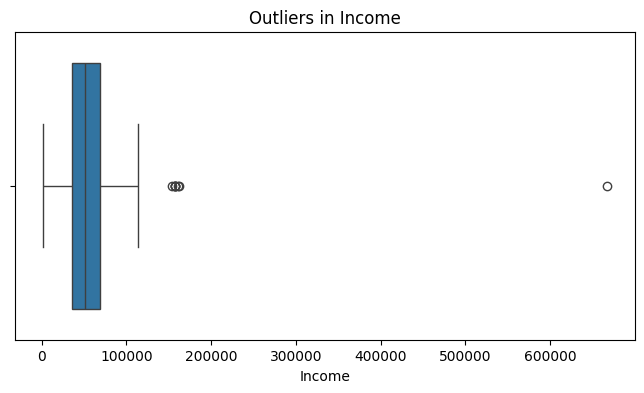

Kidhome: 0 anomalous values


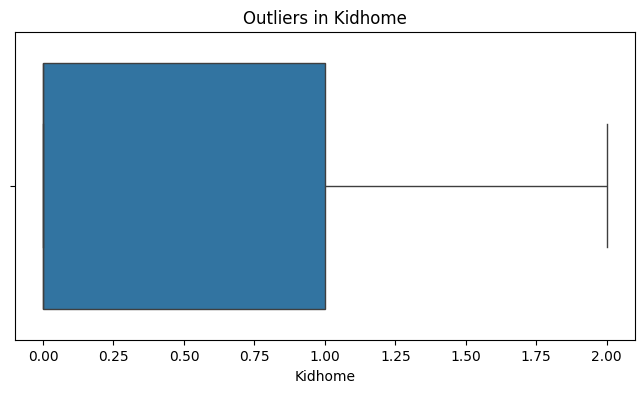

Teenhome: 0 anomalous values


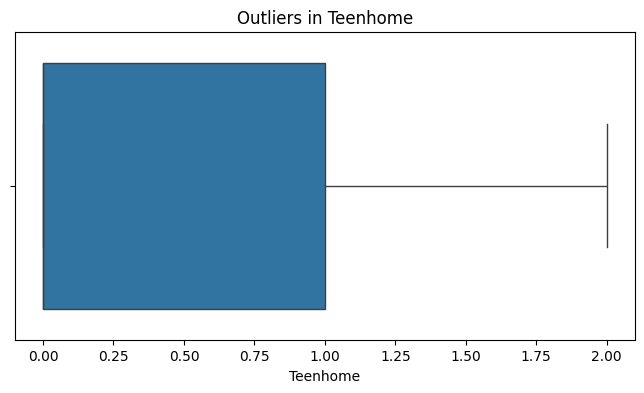

Recency: 0 anomalous values


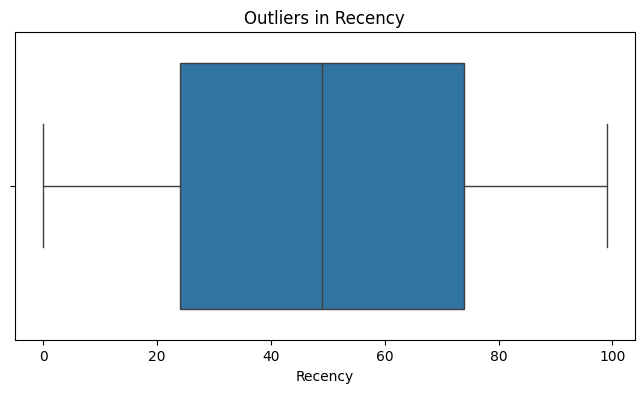

MntWines: 35 anomalous values


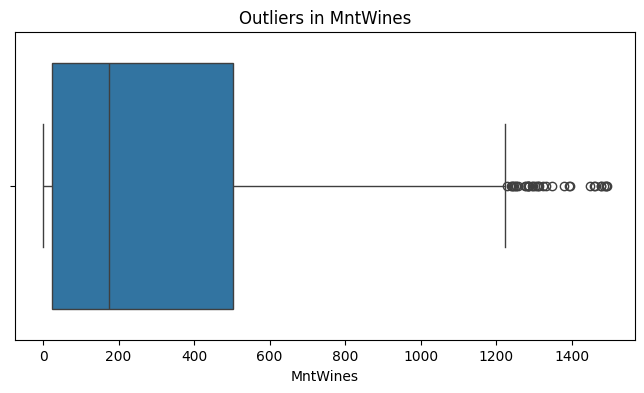

MntFruits: 227 anomalous values


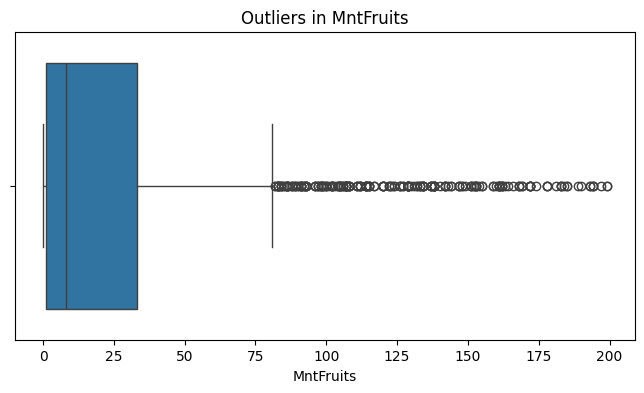

MntMeatProducts: 175 anomalous values


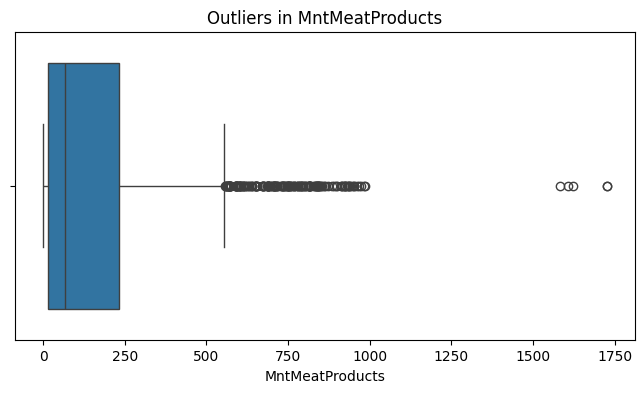

MntFishProducts: 223 anomalous values


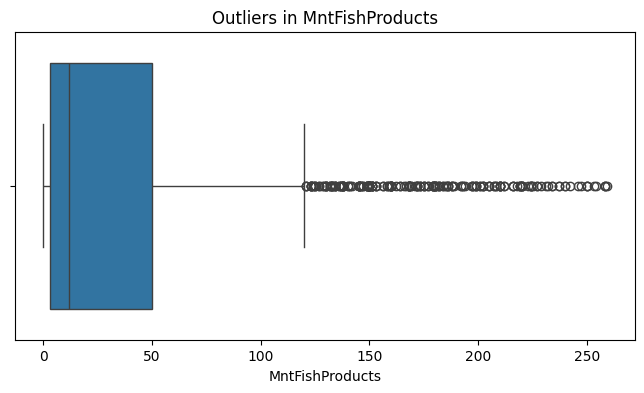

MntSweetProducts: 248 anomalous values


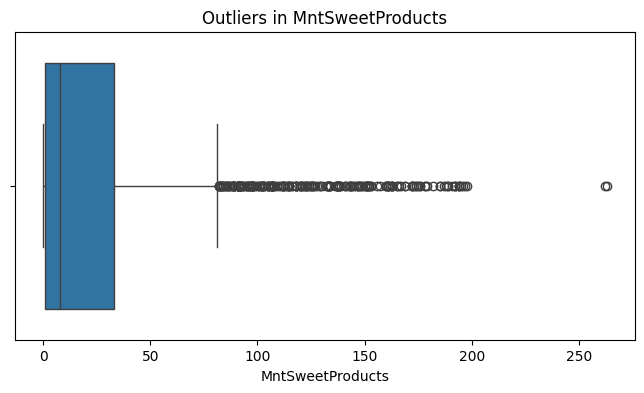

MntGoldProds: 207 anomalous values


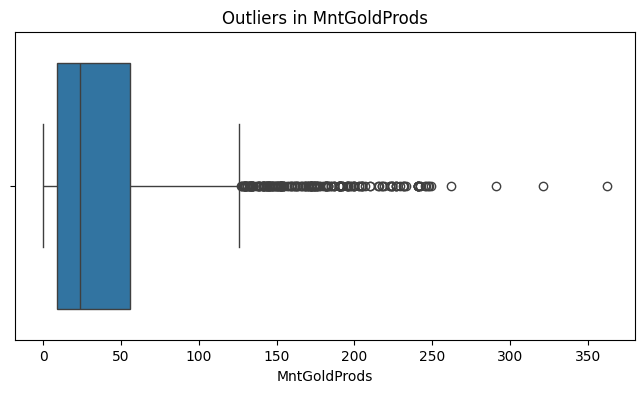

NumDealsPurchases: 86 anomalous values


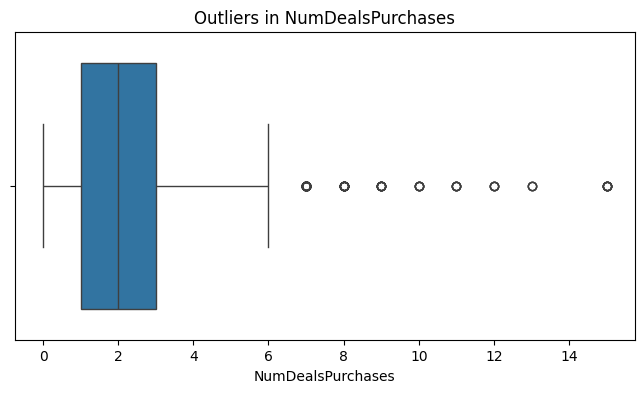

NumWebPurchases: 4 anomalous values


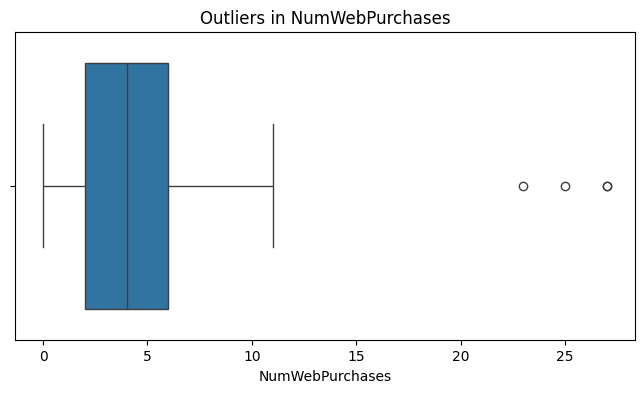

NumCatalogPurchases: 23 anomalous values


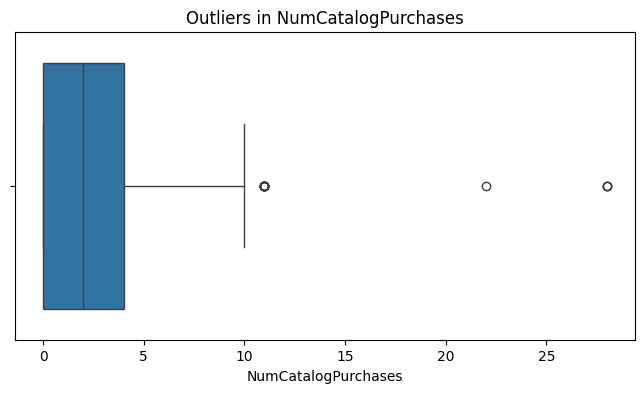

NumStorePurchases: 0 anomalous values


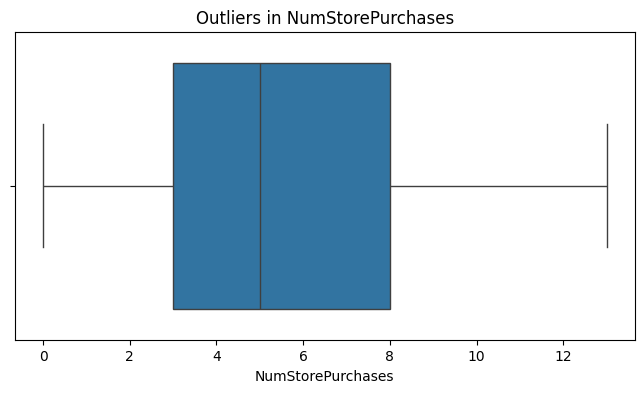

NumWebVisitsMonth: 8 anomalous values


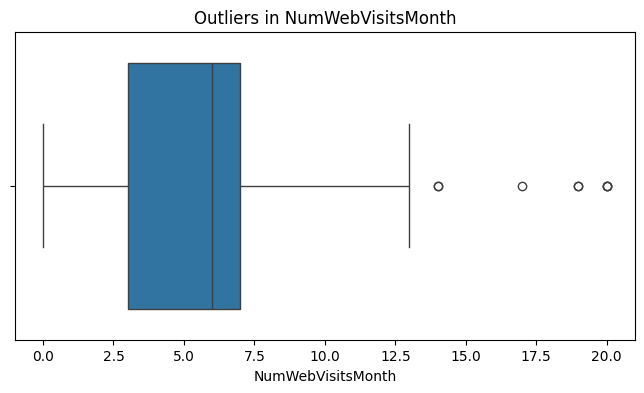

Response: 334 anomalous values


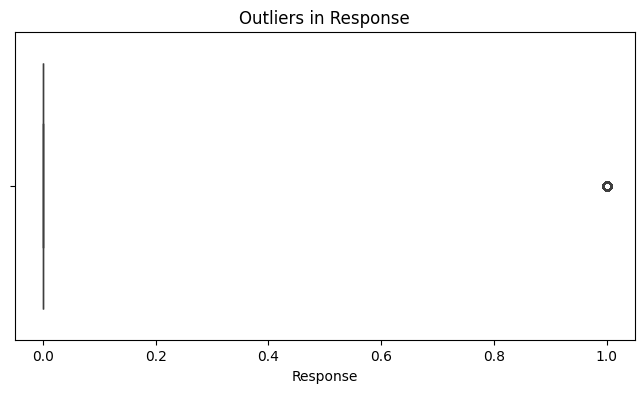

Complain: 21 anomalous values


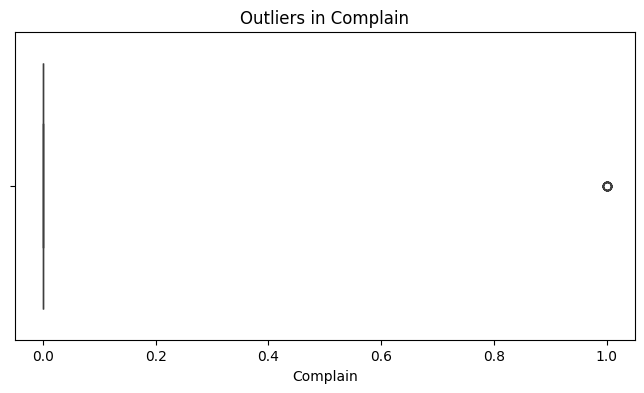


 Simple aggregations

 Aggregation by Education:
                     Id   Year_Birth        Income   Kidhome  Teenhome  \
Education                                                                
2n Cycle    5588.211823  1972.024631  47633.190000  0.477833  0.408867   
Basic       5396.407407  1977.462963  20306.259259  0.629630  0.092593   
Graduation  5652.523514  1969.635315  52720.373656  0.444543  0.494232   
Master      5403.648649  1966.878378  52917.534247  0.454054  0.535135   
PhD         5619.096708  1966.043210  56145.313929  0.401235  0.598765   

              Recency    MntWines  MntFruits  MntMeatProducts  \
Education                                                       
2n Cycle    48.418719  198.182266  28.955665       141.256158   
Basic       48.444444    7.240741  11.111111        11.444444   
Graduation  50.035492  284.268855  30.774623       179.488909   
Master      47.586486  333.075676  21.654054       163.378378   
PhD         48.483539  404.495885  20.049

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("superstore_data.csv")

print("Data types")
print(df.dtypes)
print("\n Dataset size")
print(df.shape)

print("\n Distribution of key features")
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=np.number).columns

for col in cat_cols[:5]: 
    plt.figure(figsize=(8,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribution of categories: {col}")
    plt.show()

for col in num_cols[:5]:  
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Numerical feature distribution {col}")
    plt.show()

print("\n Scale of numerical values")
print(df[num_cols].describe().T[["min", "max", "mean", "std"]])

print("\n Correlation analysis of numerical features")
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("\n Correlation matrix")
plt.show()

print("\n Anomaly detection")
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {outliers.shape[0]} anomalous values")
    
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

print("\n Simple aggregations")
for col in cat_cols[:3]: 
    print(f"\n Aggregation by {col}:")
    print(df.groupby(col)[num_cols].mean().head())

print("\n Statistical analysis of numerical features")
print(df[num_cols].describe(include='all'))

print("\nSkewness")
print(df[num_cols].skew())

print("\nKurtosis")
print(df[num_cols].kurt())

In [44]:
import os
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
from dotenv import load_dotenv
from datetime import datetime

load_dotenv(override=True)

url_object = URL.create(
    drivername="postgresql+psycopg2",
    username=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD"),
    host=os.getenv("DB_HOST"),
    port=os.getenv("DB_PORT"),
    database=os.getenv("DB_NAME")
)

engine = create_engine(url_object, connect_args={'options': '-c client_encoding=utf8'})

csv_file_path = "superstore_data.csv" 

df = pd.read_csv(csv_file_path, encoding='utf-8')

print(f" File successfully read! Rows: {len(df)}")

def generate_random_timestamps(num_records):
    start_date = datetime(2026, 1, 1)
    end_date = datetime(2026, 12, 31, 23, 59, 59)

    start_timestamp = pd.Timestamp(start_date).value // 10**9
    end_timestamp = pd.Timestamp(end_date).value // 10**9
    
    random_timestamps = np.random.randint(start_timestamp, end_timestamp, num_records)
    return pd.to_datetime(random_timestamps, unit='s')

df['timestamp'] = generate_random_timestamps(len(df))

table_name = "superstore_data"

try:
    df.to_sql(
        name=table_name,
        con=engine,
        if_exists='replace',
        index=False,
        method='multi',
        chunksize=1000 
    )
    print("Data successfully loaded into the database")
except Exception as e:
    print(f"Critical error during write: {e}")

 File successfully read! Rows: 2240
Data successfully loaded into the database
